In [2]:
%pylab inline
import pandas as pd
import numpy as np
from datetime import datetime
import os

Populating the interactive namespace from numpy and matplotlib


In [3]:
d=os.path.expanduser("~")
d=os.path.join(d,"Desktop", "Data")
d = os.path.join(d, "Qms")

In [4]:
a = os.listdir(d)
sorted(a)

['S1_191225_163604.qst',
 'S1_191225_163642.qst',
 'S1_191225_164121.qst',
 'S1_191225_164252.qst',
 'S1_191225_164724.qst',
 'S1_191225_174021.qst',
 'S1_191225_174310.qst',
 'S1_191225_195611.qst',
 'S1_191225_200105.qst',
 'S1_191226_144541.qst',
 'S1_191226_182447.qst',
 'S1_191227_104856.qst',
 'S1_191227_145934.qst',
 'S1_191227_150333.qst',
 'S1_191227_162147.qst',
 'S1_191227_163044.qst',
 'S1_191227_163735.qst',
 'S1_191227_163855.qst',
 'S1_191227_164023.qst',
 'S1_191227_164045.qst',
 'S1_191227_164118.qst',
 'S1_191227_164210.qst',
 'S1_191227_164256.qst',
 'S1_191227_164815.qst',
 'S1_191227_165236.qst',
 'S1_191227_165320.qst',
 'S1_191227_165420.qst',
 'S1_191227_165539.qst',
 'S1_191227_171943.qst',
 'S1_191227_172635.qst',
 'S1_191227_173958.qst',
 'S1_191227_201724.csv',
 'S1_191227_201724.qst']

In [5]:
""" csv """
base_time = datetime(2019, 12, 27, 20, 21, 38)
start_time = datetime(2019, 12, 27, 20, 17, 24)
d_time = (start_time - base_time).total_seconds()
q_csv = pd.read_csv(d + "/S1_191227_201724.csv", header=36, encoding='utf-8')
print(q_csv.columns)
print(q_csv)

Index(['測定回数', '経過時間   ', 'アナログ１', 'アナログ２', '全圧   ', '1', '2', '3', '4', '5',
       '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17',
       '18', '19', '20'],
      dtype='object')
      測定回数        経過時間            アナログ１         アナログ２     全圧                1  \
0        1  000:00:00.000  1.000000e-99  1.000000e-99  0.000061  1.000000e-14   
1        2  000:00:00.704  1.000000e-99  1.000000e-99  0.000061  1.670000e-08   
2        3  000:00:01.407  1.000000e-99  1.000000e-99  0.000061  1.670000e-08   
3        4  000:00:02.094  1.000000e-99  1.000000e-99  0.000056  1.370000e-08   
4        5  000:00:02.813  1.000000e-99  1.000000e-99  0.000056  1.370000e-08   
...    ...            ...           ...           ...       ...           ...   
4754  4755  000:55:42.891  1.000000e-99  1.000000e-99  0.000038  5.430000e-12   
4755  4756  000:55:43.594  1.000000e-99  1.000000e-99  0.000038  5.450000e-12   
4756  4757  000:55:44.297  1.000000e-99  1.000000e-99  0.000038  5.450

In [6]:
""" calculate time """
def calc_time(time: str):
    hour, minute, second = time.split(':')
    tmp = int(hour)*60*60 + int(minute)*60 + float(second)
    return tmp + d_time
calc_time('000:55:45.719')

3091.719

3091.719


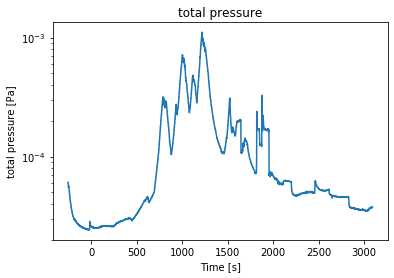

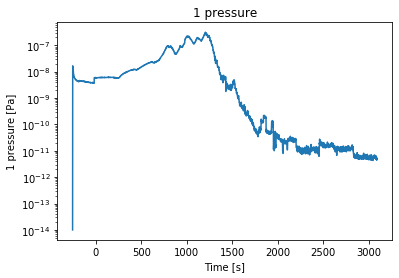

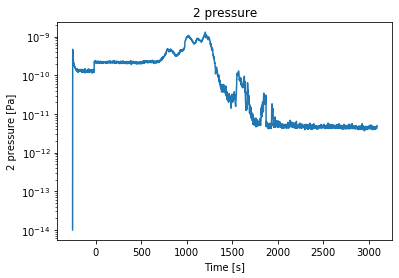

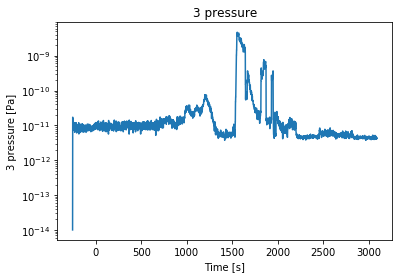

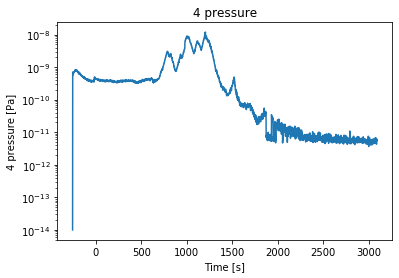

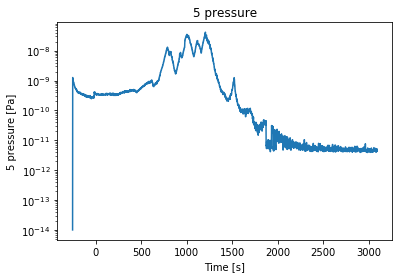

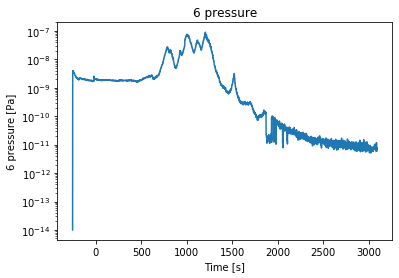

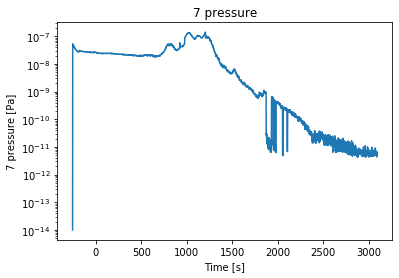

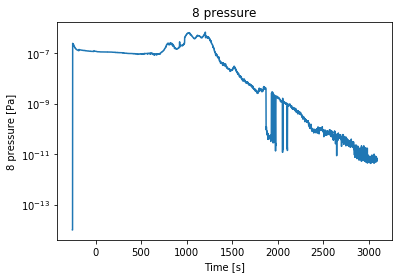

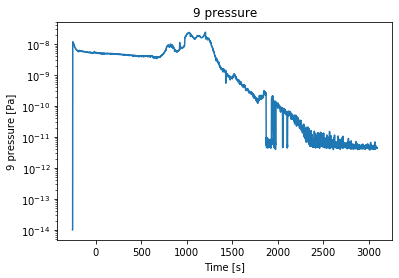

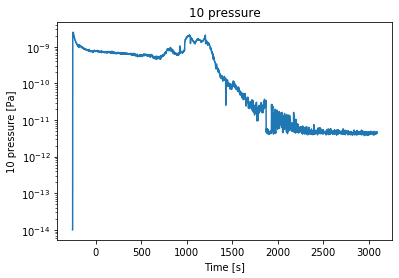

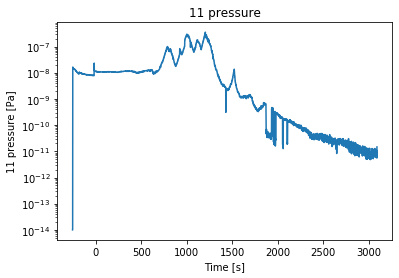

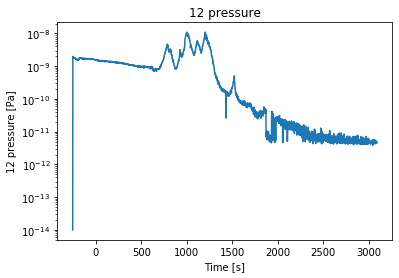

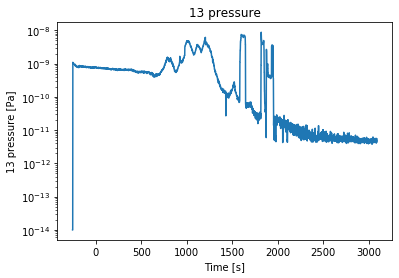

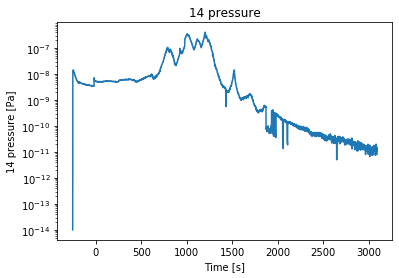

<Figure size 432x288 with 0 Axes>

In [7]:
data = np.array(q_csv)
data[:, 1] = [calc_time(i) for i in data[:, 1]]
print(data[-1, 1])

def plot_qms(data: np.ndarray):
    # total pressure
    plt.title("total pressure")
    plt.xlabel("Time [s]")
    plt.ylabel("total pressure [Pa]")
    yscale('log')
    plt.plot(data[:, 1], data[:, 4])
    plt.figure()

    for i in range(1, 15):
        plt.title("{} pressure".format(i))
        plt.xlabel("Time [s]")
        plt.ylabel("{} pressure [Pa]".format(i))
        yscale('log')
        plt.plot(data[:, 1], data[:, i+4])
        plt.figure()

plot_qms(data)